# Importing Libraires

In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Divided Dataset into training and testing data

In [17]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

# Creating a Deep Learning Model

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,input_shape=(100,),activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4525 - accuracy: 0.8723
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1279 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0871 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0632 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0491 - accuracy: 0.9854


In [19]:
model.evaluate(x_test,y_test) #evaluating the model

313/313 [==============================] - 1s 1ms/step - loss: 0.0857 - accuracy: 0.9746


[0.08567987382411957, 0.9746000170707703]

In [20]:
y_predicted = model.predict(x_test) #storing the preditcion of the model

In [21]:
y_prediced_int = [np.argmax(i) for i in y_predicted] #converting the y_predicted data into the int values


# Representation of Confusion Matrix

Text(69.0, 0.5, 'Truth')

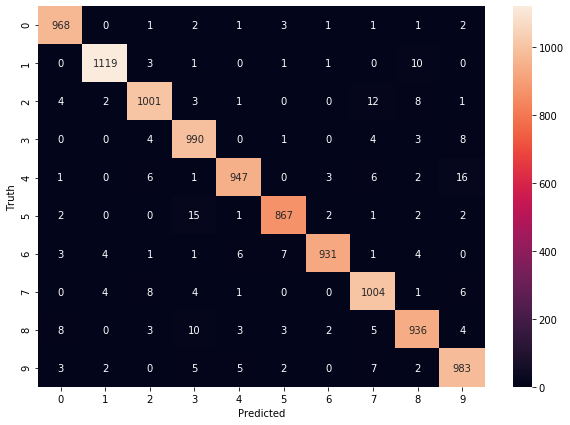

In [23]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_prediced_int)
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')